In [132]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns

### Lectura, selección de columnas y conversión de datos

In [133]:
df = pd.read_csv('netflix_titles.csv')

##Cantidad de valores nulos

df.isna().sum().sort_values(ascending=False) ##La columna director tiene 2634 datos faltantes. Seguido de country y cast con 831 y 825 faltantes respectivamente.
df.isna().sum().sort_values(ascending=False)/df.shape[0]*100 ##Esto es equivalente a que el 29.9% de los datos de director son nulos.

##Remplazar los valores nulos con la moda
df['director'] = df['director'].fillna(df['director'].mode()[0])
df['cast'] = df['cast'].fillna(df['cast'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

##Información básica del dataframe antes de la conversión
# df.info()   ##Todas las columnas tienen datos de tipo objeto (string) excepto el año de salida de la serie/película.

# ##Convertir el año de adición de la película/serie a DateTime
df['date_added'] = df['date_added'].str.strip() ##Primero se debe solucionar que algunos valores tienen espacios vaciós en medio
df['date_added'] = pd.to_datetime(df['date_added'],format = '%B %d, %Y')

# ##Verificar filas repetidas
df.duplicated().sum() #No hay filas repetidas

# ## Optimizar los datos de la columna release year
df = df.astype({'release_year':int})

# ##Eliminar columnas innecesarias
df.drop(columns=['description','show_id'],inplace=True)



### Identificar valores atípicos/Outliers

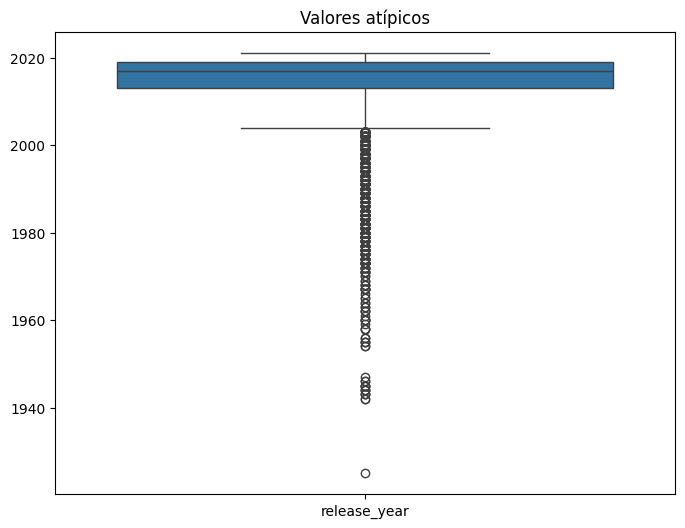

In [134]:
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data=df,ax=ax)
ax.set_title('Valores atípicos')
plt.show()

##La columna de año de estreno tiene muchos valores por fuera del rango intercuartílico. Vamos a trabajar solo con valores dentro de un rango 1.5 veces el rango intercuartílico.

q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)

iqr = q3-q1
limite_inferior = q1 - 1.5*iqr
limite_superior = q3 + 1.5*iqr

df = df.loc[(df['release_year']>=limite_inferior)&(df['release_year']<=limite_superior)]


### Análisis exploratorio - Distribución de los datos

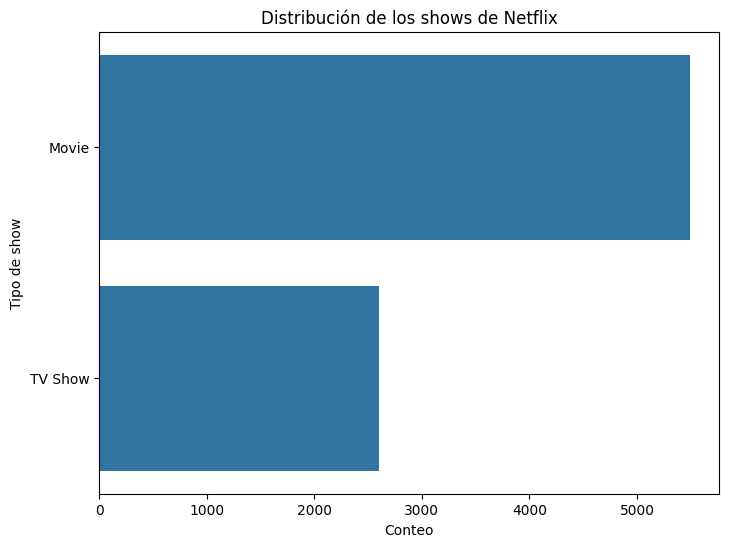

In [135]:
##Tipo de show

plt.figure(figsize=(8,6))

sns.countplot(data=df['type']).set_title('Distribución de los shows de Netflix')
plt.xlabel('Conteo')
plt.ylabel('Tipo de show')
plt.show()

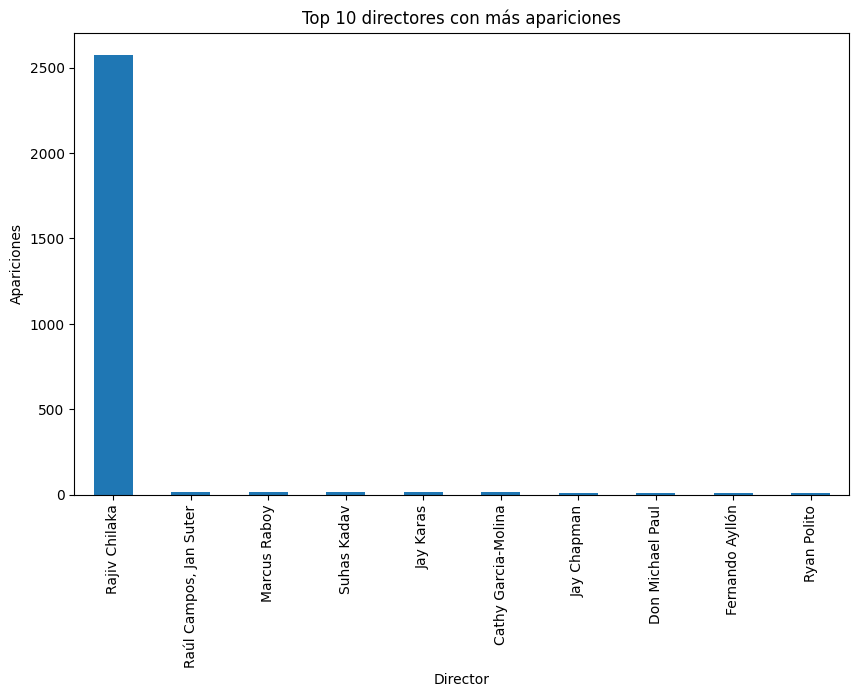

In [136]:
##Mejores directores
plt.figure(figsize=(10,6))
df['director'].value_counts(sort=True).head(10).plot.bar(title='Top 10 directores con más apariciones',xlabel='Director',ylabel='Apariciones')
plt.show()

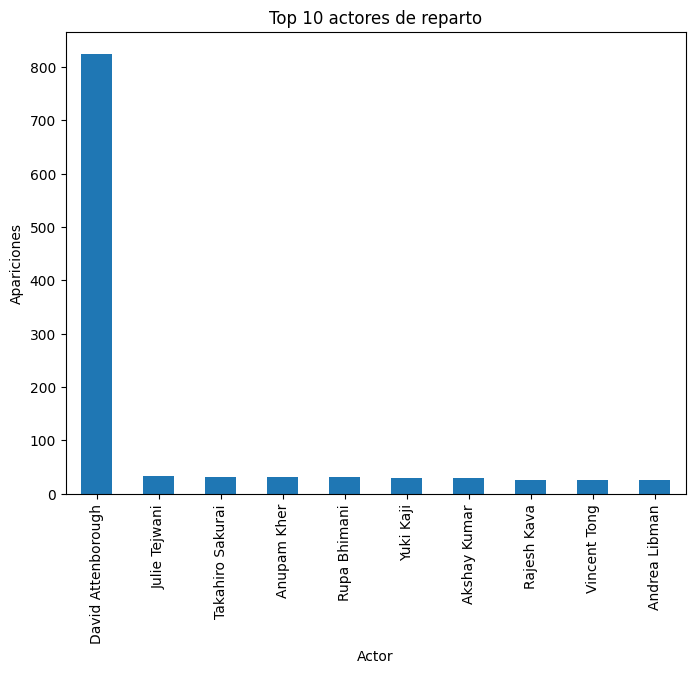

In [137]:
## Top actores del reparto

top_cast = df['cast'].str.split(', ',expand=True).stack().value_counts(sort=True).head(10)
plt.figure(figsize=(8,6))
top_cast.plot.bar(title='Top 10 actores de reparto',xlabel='Actor',ylabel='Apariciones')
plt.show()

In [138]:
print()

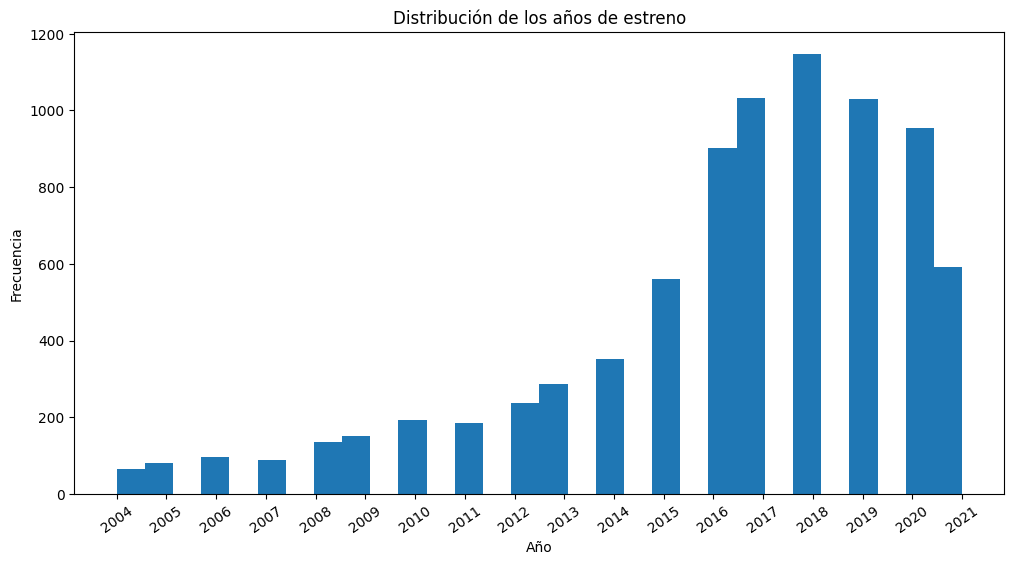

In [139]:
##año de estreno de los shows/películas
plt.figure(figsize=(12,6))

df['release_year'].plot(kind='hist',bins=30,title='Distribución de los años de estreno',xlabel='Año',ylabel='Frecuencia')
plt.xticks(sorted(df['release_year'].unique()))
plt.tick_params(rotation=35,axis='x')
plt.show()

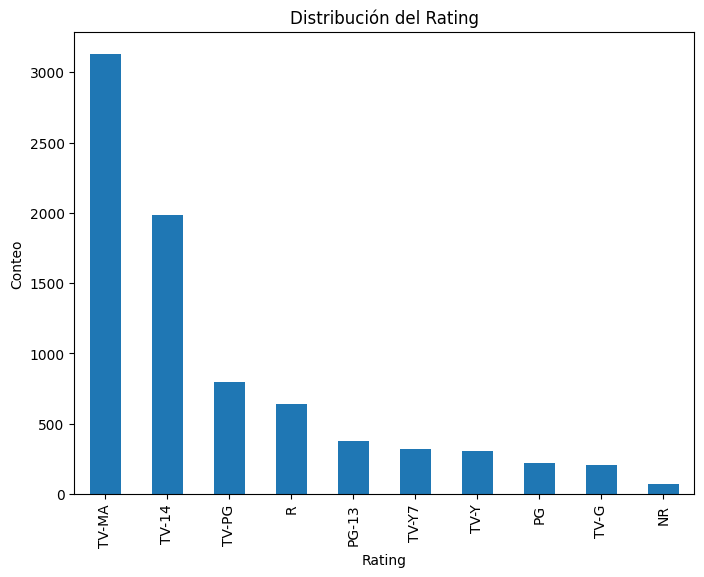

In [140]:
## Distribución de las calificaciones (Rating)

plt.figure(figsize=(8,6))
df['rating'].value_counts(sort=True).head(10).plot.bar(xlabel='Rating',title='Distribución del Rating',ylabel='Conteo')
plt.show()

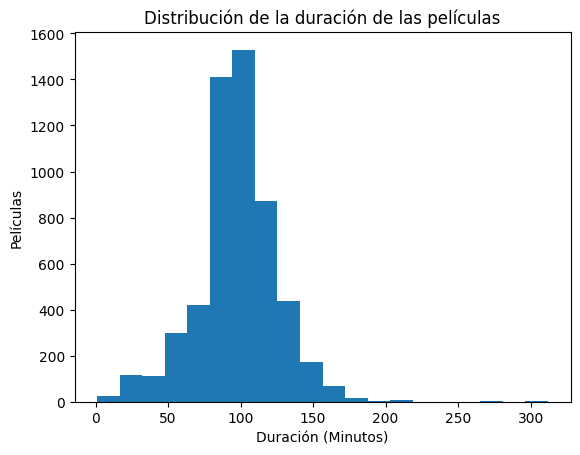

In [141]:
##Distribución de la duración de las películas
films = df.loc[df['type']=='Movie']
films = films['duration'].str.split(' ',expand=True).drop(columns=1).astype(int)

films[0].plot(kind='hist',bins=20,xlabel='Duración (Minutos)',ylabel='Películas',title='Distribución de la duración de las películas')
plt.show()

### Proceso de Machine Learning

In [142]:
###El siguiente paso es verificar qué valores tienen las columnas de tipo objeto

cat = df.select_dtypes('O')

for i, col in enumerate(cat):
    # sns.countplot(data=cat, y=col)
    print(cat[col].value_counts())

type
Movie      5487
TV Show    2601
Name: count, dtype: int64
title
Dick Johnson Is Dead        1
Spectral                    1
#Rucker50                   1
White Girl                  1
For the Love of Spock       1
                           ..
Pretville                   1
Yeh Ballet                  1
The Last Thing He Wanted    1
The Body                    1
Zubaan                      1
Name: count, Length: 8088, dtype: int64
director
Rajiv Chilaka             2576
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
                          ... 
KVR Mahendra                 1
Juan Carlos Rulfo            1
Raj R                        1
Timo Vuorensola              1
Mozez Singh                  1
Name: count, Length: 4199, dtype: int64
cast
David Attenborough                                                                                                                                                   8

In [143]:
df['rating'].value_counts()

rating
TV-MA       3129
TV-14       1986
TV-PG        797
R            638
PG-13        379
TV-Y7        318
TV-Y         304
PG           222
TV-G         207
NR            73
G             21
TV-Y7-FV       6
NC-17          3
UR             2
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64